# **IPL Data Analysis: Unveiling Insights from Deliveries and Matches**

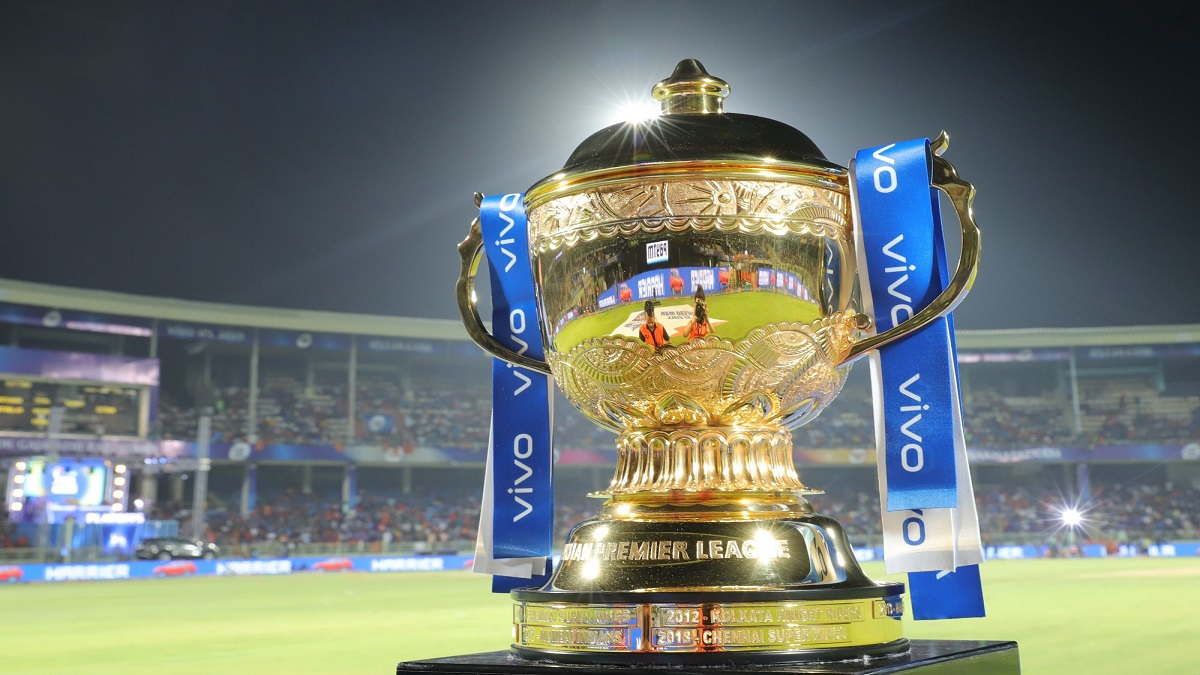

# **756 matches played from 2008 to 2019.**

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly import figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Files**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd '/content/drive/My Drive/Indian Premier League Grip_Int'

/content/drive/My Drive/Indian Premier League Grip_Int


In [4]:
deli = pd.read_csv("/content/drive/MyDrive/Indian Premier League Grip_Int/deliveries.csv")
matches = pd.read_csv("/content/drive/MyDrive/Indian Premier League Grip_Int/matches.csv")

# **Knowing The Data**

In [5]:
#deliveries data
deli.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
148499,628,2,Delhi Daredevils,Sunrisers Hyderabad,18,4,KK Nair,CR Brathwaite,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
70653,299,2,Rajasthan Royals,Mumbai Indians,8,1,SR Watson,R Dravid,Harbhajan Singh,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
163130,7947,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,3,MK Pandey,CR Brathwaite,SP Narine,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
170790,11316,2,Chennai Super Kings,Rajasthan Royals,14,7,AT Rayudu,MS Dhoni,BA Stokes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
125405,528,2,Delhi Daredevils,Kings XI Punjab,19,2,Yuvraj Singh,MA Agarwal,Anureet Singh,0,...,0,0,0,0,0,0,0,Yuvraj Singh,caught,Sandeep Sharma


In [6]:
#length of deliveries
len(deli)

179078

In [7]:
#matches data
matches.sample(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
206,207,2010,Mumbai,2010-04-03,Mumbai Indians,Deccan Chargers,Mumbai Indians,bat,normal,0,Mumbai Indians,63,0,AT Rayudu,Brabourne Stadium,BR Doctrove,S Ravi,NaN
441,442,2013,Jaipur,2013-05-12,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,SR Watson,Sawai Mansingh Stadium,HDPK Dharmasena,CK Nandan,NaN
144,145,2009,Durban,2009-05-05,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,78,0,GC Smith,Kingsmead,SS Hazare,IL Howell,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
#length of matches
len(matches),len(matches.columns)

(756, 18)

In [9]:
# deliveries columns
deli.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [10]:
# matches columns
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [11]:
#deliveries info
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [12]:
#matches info
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [13]:
#deliveries stats
deli.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [14]:
#matches stats
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [15]:
#data from date
matches["date"] = pd.to_datetime(matches["date"]).dt.date
# matches["date"] =
matches.date.min()

datetime.date(2008, 4, 18)

In [16]:
matches.date.max()

datetime.date(2019, 12, 5)

# **The Data is from 2008 - 2019**

# **Data Cleaning**

In [17]:
# deliveries duplicates
deli.duplicated().sum()

23

In [18]:
# matches duplicates
matches.duplicated().sum()

0

In [19]:
#viewing duplicated rows in deliveries
dups = deli.duplicated(keep=False)
dup_rows = deli[dups]
dup_rows

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52169,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162803,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162804,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162863,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162963,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [20]:
#dropping duplicates in deliveries
deli.drop_duplicates(inplace=True)

In [21]:
#replacing NaN values in deliveries
deli["player_dismissed"].fillna("No Dismissal", inplace = True)
deli["dismissal_kind"].fillna("No Dismissal", inplace = True)
deli["fielder"].fillna("None", inplace = True)

In [22]:
deli.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [23]:
#dealing with matches null values
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [24]:
matches[matches["city"].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


# **Based On The Venue In The Above Dataframe The City Is Dubai**

In [25]:
#replacing nan values in city columns in matches data with Dubai as all 7 are held in Dubai International Cricket Stadium
matches["city"].fillna("Dubai", inplace=True)

In [26]:
##player of the match and result nan
matches[matches["winner"].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [27]:
#player of the match and result both have nan values in same rows and no match was played
matches.winner.fillna("No Decision", inplace=True)
matches["player_of_match"].fillna("No Decision", inplace=True)

In [28]:
#replacing umpires nan values with unknown
matches["umpire1"].fillna("Unknown", inplace=True)
matches["umpire2"].fillna("Unknown", inplace=True)
matches["umpire3"].fillna("Unknown", inplace=True)

In [29]:
#viewing the matches na values after cleaning
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [30]:
#replacing M.Chinnaswamy Stadium with M Chinnaswamy Stadium
matches.venue.replace(to_replace={"M. Chinnaswamy Stadium":"M Chinnaswamy Stadium"}, inplace=True)

In [31]:
#replacing Delhi Daredevils with Delhi Capitals and Rising Pune Supergiant with Rising Pune Supergiants
deli.batting_team.replace(to_replace={"Delhi Daredevils":"Delhi Capitals"}, inplace=True)
deli.bowling_team.replace(to_replace={"Delhi Daredevils":"Delhi Capitals"}, inplace=True)
matches.team1.replace(to_replace={"Delhi Daredevils":"Delhi Capitals"}, inplace=True)
matches.team2.replace(to_replace={"Delhi Daredevils":"Delhi Capitals"}, inplace=True)
deli.batting_team.replace(to_replace={"Rising Pune Supergiant":"Rising Pune Supergiants"}, inplace=True)
deli.bowling_team.replace(to_replace={"Rising Pune Supergiant":"Rising Pune Supergiants"}, inplace=True)
matches.team1.replace(to_replace={"Rising Pune Supergiant":"Rising Pune Supergiants"}, inplace=True)
matches.team2.replace(to_replace={"Rising Pune Supergiant":"Rising Pune Supergiants"}, inplace=True)

# **Checking If The Data Can Be Merged Based On id Columns**

In [32]:
# number of unique values in id column in deliveries
del_id = deli.match_id.nunique()

In [33]:
# number of unique values in id column in matches
mat_id = matches.id.nunique()

In [34]:
#all values of id column in deliveries
del_id = deli.match_id.unique()

In [35]:
#all values of match_id column in matches
mat_id = matches.id.unique()

In [36]:
#converting the id columns to set to check the values in any order
del_set = set(del_id)
mat_set = set(mat_id)

In [37]:
del_set == mat_set

True

# **Merging The Data**

In [38]:
#renaming the id column in deliveries to match_id
matches.rename(columns={"id":"match_id"}, inplace=True)

In [39]:
#merging the matches data on deliveries dat based on match_id
del_match = deli.merge(matches, how="inner", on="match_id")

In [40]:
#shape after merging the data
del_match.shape

(179055, 38)

In [41]:
#merged data columns
del_match.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'city', 'date', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1',
       'umpire2', 'umpire3'],
      dtype='object')

In [42]:
#teams participating
teams_participating = pd.unique(del_match[["batting_team", "bowling_team"]].values.ravel("k"))
tp = pd.DataFrame(teams_participating, columns=["teams_participating"]).sort_values("teams_participating")
ff.create_table(tp, "magenta_r")

In [43]:
# number of teams participating
len(tp)

13

In [44]:
# number of venues
len(matches.venue.unique())

40

In [45]:
#all venues
ff.create_table(pd.DataFrame(matches.venue.unique(), columns=["venue"]).sort_values("venue"), "teal_r")

In [46]:
#matches played by each team
t1 = matches.groupby("team1")["team1"].count().reset_index(name="total_games")
t1.columns = ["team1", "games"]
t2 = matches.groupby("team2")["team2"].count().reset_index(name="tot_gam")
t2.columns= ["team1", "games1"]
total_matches = t1.merge(t2, on="team1", how="inner")
total_matches["total_matches"] = total_matches["games1"] + total_matches["games"]
total_matches.rename(columns={"team1":"team"}, inplace=True)
total_matches.drop(["games", "games1"], axis=1, inplace=True)
ff.create_table(total_matches.sort_values("total_matches", ascending=False))

In [47]:
#plot for most matches
px.scatter(total_matches.sort_values("total_matches", ascending=False), x="team", y="total_matches",
           color="total_matches", color_continuous_scale="oryel",
           size="total_matches",
           text="total_matches",
           title="Comparing Matches Played by Each Team"
           ).update_layout(title_font=dict(size=20, color="darkgreen"), title_x=0.5
           ).update_traces(textposition="top center")

In [48]:
#total runs by each team and their mean/merging with total_matches
total_runs = del_match.groupby("batting_team").total_runs.sum().sort_values(ascending=False).reset_index()
total_runs.rename(columns={"batting_team":"team"}, inplace=True)
total_runs = total_runs.merge(total_matches, on="team", how="inner")
total_runs["average_runs"] = round(total_runs["total_runs"]/total_runs["total_matches"],2)
ff.create_table(total_runs, "pinkyl_r")

In [49]:
#plot for Most runs by team
px.bar(total_runs, x="team", y="total_runs",
       color="total_runs", color_continuous_scale="oryel_r",
       text=[f"{row['total_runs']}<br>{row['average_runs']}" for i, row in total_runs.iterrows()],
       title="Comparing Runs Scored By Each Team<br>First Line Shows Total Runs Second Line Average Runs"
       ).update_layout(title_x=0.5, title_font=dict(color="darkred", size=20))

In [50]:
#season wise total runs from each team
season_wise_tot_runs = del_match.groupby(["season", "batting_team"])["total_runs"].sum().reset_index(
                            ).sort_values(["season","total_runs"], ascending=[True,False])
season_wise_tot_runs

,season,batting_team,total_runs
6,2008,Rajasthan Royals,2601
0,2008,Chennai Super Kings,2520
3,2008,Kings XI Punjab,2464
1,2008,Deccan Chargers,2229
2,2008,Delhi Capitals,2118
...,...,...,...
95,2019,Kolkata Knight Riders,2587
99,2019,Sunrisers Hyderabad,2561
94,2019,Kings XI Punjab,2528
98,2019,Royal Challengers Bangalore,2286


In [51]:
px.treemap(season_wise_tot_runs, path=["season", "batting_team", "total_runs"],
           values="total_runs",
           color="season", color_continuous_scale="aggrnyl",
           title="Runs Scored by Each Team in Each Season")

In [52]:
#counting wickets and average wickets by each team
count_wickets= del_match[del_match["player_dismissed"] != "No Dismissal"]
team_wickets = count_wickets.groupby("bowling_team")["player_dismissed"].count().sort_values(ascending=False).reset_index()
team_wickets.rename(columns={"bowling_team":"team"}, inplace=True)
team_wickets = team_wickets.merge(total_matches, on="team", how="inner")
team_wickets["average_wickets"] = round(team_wickets["player_dismissed"]/team_wickets["total_matches"],2)
ff.create_table(team_wickets, "pinkyl_r")

In [53]:
#plot for Most wickets by team
px.bar(team_wickets, x="team", y="player_dismissed",
       color="player_dismissed", color_continuous_scale="tropic_r",
       text=[f"{row['player_dismissed']}<br>{row['average_wickets']}" for i, row in team_wickets.iterrows()],
       title="Comparing Total Wickets By Each Team<br>First Line Shows Total Wickets Second Line Average Wickets"
       ).update_layout(title_x=0.5, title_font=dict(color="darkred", size=20))

In [54]:
#wickets season wise
season_team_wickets = count_wickets.groupby(["season", "bowling_team"])["player_dismissed"].count(
                      ).reset_index().sort_values(["season","player_dismissed"], ascending=[True, False])
season_team_wickets

,season,bowling_team,player_dismissed
6,2008,Rajasthan Royals,109
2,2008,Delhi Capitals,96
3,2008,Kings XI Punjab,95
5,2008,Mumbai Indians,94
0,2008,Chennai Super Kings,93
...,...,...,...
99,2019,Sunrisers Hyderabad,87
94,2019,Kings XI Punjab,76
97,2019,Rajasthan Royals,72
98,2019,Royal Challengers Bangalore,69


In [55]:
px.treemap(season_team_wickets, path=["season", "bowling_team", "player_dismissed"],
           color="season", color_continuous_scale="reds",
           values="player_dismissed",
           title="Total Wickets Taken by Each Team Season Wise")

In [56]:
#player with most runs
player_runs = deli.groupby("batsman").batsman_runs.sum().sort_values(ascending=False).reset_index(name="total_runs").head(20)
ff.create_table(player_runs, "teal_r")

In [57]:
#plot for top runs by batsman
px.scatter(player_runs, x="batsman", y="total_runs",
           color="total_runs", color_continuous_scale="magenta",
           size="total_runs",
           text="total_runs",
           title="Top 20 Run Scorers"
           ).update_layout(title_x=0.5, title_font=dict(size=20)
           ).update_traces(textposition="top center")

In [58]:
#top wicket takers
#count_wickets= del_match[del_match["player_dismissed"] != "No Dismissal"]

player_wickets = count_wickets.groupby("bowler").player_dismissed.count().sort_values(ascending=False).reset_index(name="wickets").head(20)
ff.create_table(player_wickets,"peach_r")

In [59]:
#plot for most wicket takers
px.scatter(player_wickets, x="bowler", y="wickets",
           color="wickets", color_continuous_scale="peach",
           size="wickets",
           text="wickets",
           title="Top 20 Wicket Takers"
           ).update_layout(title_x=0.5, title_font=dict(size=20)
           ).update_traces(textposition="top center")

In [60]:
#most games won
most_wins = matches.winner.value_counts().reset_index(name="matches_won")
most_wins.columns = ["team", "matches_won"]
most_wins = most_wins.merge(total_matches, on="team", how="inner")
most_wins["win_ratio"] = round(most_wins["matches_won"]/most_wins["total_matches"],2)
ff.create_table(most_wins)

In [61]:
#most games won
px.bar(most_wins, x="team", y="matches_won",
       color="matches_won", color_continuous_scale="sunset",
       text=[f"{row['matches_won']}<br>{row['win_ratio']}" for i, row in most_wins.iterrows()],
       title="Comparing Games Won And Their Win Ratio<br>First Line Shows Total Games Won Second Line Win Ratio"
       ).update_layout(title_x=0.5, title_font=dict(color="darkred", size=20))

In [62]:
#most popular toss choice
toss_choice = matches.toss_decision.value_counts().reset_index(name="count")
toss_choice.columns = ["toss_choice", "count"]
px.pie(toss_choice, values="count", names="toss_choice",
       color="count", color_discrete_sequence=px.colors.sequential.Cividis_r,
       title="Representing The Toss Choice"
       ).update_traces(textinfo="percent+label+value")

In [63]:
#win count for toss choice
toss_n_match_win = matches.loc[matches["toss_winner"] == matches["winner"]]
len(toss_n_match_win)

393

In [64]:
#toss and match lost
toss_n_match_loser = matches.loc[matches["toss_winner"] != matches["winner"]]
len(toss_n_match_loser)

363

In [65]:
#creating df to plot the win ratio for toss and how it affects the result
toss_w_l = pd.Series({"toss and match won":len(toss_n_match_win),
                         "otherwise":len(toss_n_match_loser)})


px.pie(toss_w_l, values=toss_w_l.values, names=toss_w_l.index,
       color=toss_w_l.values, color_discrete_sequence=px.colors.sequential.Magma_r,
       title="Toss Outcome Pie Chart"
       ).update_traces(textinfo="label+percent+value")



# **Toss Choice Effect On Result**

In [66]:
#toss choice field
field_toss = matches[matches["toss_decision"] == "field"]
len(field_toss)

463

In [67]:
#teams who chose to field and won
field_toss_wins = field_toss[field_toss["toss_winner"] == field_toss["winner"]]
len(field_toss_wins)

259

In [68]:
#win ratio for teams selecting to field
field_win_ratio = round(len(field_toss_wins)/len(field_toss),2)
field_win_ratio

0.56

In [69]:
#toss choice bat
bat_choice = matches[matches["toss_decision"] == "bat"]
len(bat_choice)

293

In [70]:
#teams who chose to bat and won
bat_wins = bat_choice[bat_choice["toss_winner"] == bat_choice["winner"]]
len(bat_wins)

134

In [71]:
#win ratio for teams selecting to bat
bat_win_ratio = round(len(bat_wins)/len(bat_choice),2)
bat_win_ratio

0.46

In [72]:
#creating the dataframe for toss count, toss wins, toss win ratio
data = {
    "Toss Decision": ["Field", "Bat"],
    "Win Ratio": [field_win_ratio, bat_win_ratio],
    "Total Wins": [len(field_toss_wins), len(bat_wins)]
}

toss_win_ratio = pd.DataFrame(data)
ff.create_table(toss_win_ratio)

In [73]:
#plotting the toss choice impact(which toss choice is better)
px.bar(toss_win_ratio, x="Toss Decision", y="Win Ratio",
       color = "Win Ratio", color_continuous_scale="pinkyl",
       title="Win Ratio and Total Wins by Toss Decision",
       text=["{:.0%}".format(ratio) for ratio in toss_win_ratio["Win Ratio"]])

# **Teams Who Choose to Field Have a Higher Chance of Winning (This can also be Affected by the Venue The Match is being Played)**

# **Toss Decision Based On Venue And Outcomes**

In [74]:
#total games played at each stadium
tot_games = matches.groupby("venue")["venue"].count().reset_index(name="total_games")
tot_games

,venue,total_games
0,ACA-VDCA Stadium,2
1,Barabati Stadium,7
2,Brabourne Stadium,11
3,Buffalo Park,3
4,De Beers Diamond Oval,3
5,Dr DY Patil Sports Academy,17
6,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,11
7,Dubai International Cricket Stadium,7
8,Eden Gardens,77
9,Feroz Shah Kotla,67


In [75]:
#stadium wise toss preference

ven_toss = matches.groupby(["venue", "toss_decision"])["toss_decision"].count().reset_index(name="count").sort_values("count", ascending=False)
ven_toss = ven_toss.merge(tot_games, on="venue", how="inner")
ven_toss["ratio_of_selection"] = round((ven_toss['count']/ven_toss['total_games']),2)
table = ff.create_table(ven_toss)
for i in range(len(table.layout.annotations)):
  table.layout.annotations[i].font.size = 8
table

In [76]:
#bar plot for toss preference for top matches played stadium
ven_20 = ven_toss.head(20)
px.bar(ven_20, x="venue", y="count",
       color="toss_decision", color_discrete_sequence=px.colors.sequential.Agsunset_r,
       barmode="group",
       text=["{:.2%}".format(ratio) for ratio in ven_20['ratio_of_selection']],
       title="Bar Chart for Stadium and Toss Choice Preference",
       height = 700
       ).update_traces(textposition="outside")

In [77]:
#stadium wise teams that selected to field and won
# field_toss = matches[matches["toss_decision"] == "field"] #using field_toss we created above
ven_field = field_toss[field_toss["winner"] == field_toss["toss_winner"]]
ven_field_count = ven_field.groupby("venue")["winner"].count().reset_index(name="count").sort_values("count",ascending=False)

#dropping the bat rows from ven_toss to merge with ven_field_count
ven_toss_field = ven_toss[ven_toss["toss_decision"] != "bat"].drop(["total_games", "ratio_of_selection"], axis=1)
ven_field_count = ven_field_count.merge(ven_toss_field, on="venue", how="inner").sort_values("count_y", ascending=False)
ven_field_count.rename(columns={"count_x":"win_count", "count_y":"total"}, inplace=True)
ven_field_count["field_win_ratio"] = round(ven_field_count["win_count"]/ven_field_count["total"],2)
ven_field_count

,venue,win_count,toss_decision,total,field_win_ratio
0,M Chinnaswamy Stadium,39,field,71,0.55
2,Wankhede Stadium,26,field,51,0.51
1,Eden Gardens,31,field,49,0.63
3,Feroz Shah Kotla,20,field,39,0.51
5,"Rajiv Gandhi International Stadium, Uppal",14,field,31,0.45
4,Sawai Mansingh Stadium,19,field,28,0.68
7,"Punjab Cricket Association Stadium, Mohali",11,field,21,0.52
6,Maharashtra Cricket Association Stadium,13,field,19,0.68
13,"MA Chidambaram Stadium, Chepauk",5,field,15,0.33
12,"Punjab Cricket Association IS Bindra Stadium, ...",5,field,11,0.45


In [78]:
#venue wise plot for teams preferring to field first and winning
field_ven_top = ven_field_count.head(12)
px.bar(field_ven_top, x="venue", y="field_win_ratio",
       color="field_win_ratio", color_continuous_scale="sunset",
       text=[f"ratio:{row['field_win_ratio']}<br>wins:{row['win_count']}<br>matches:{row['total']}" for i, row in field_ven_top.iterrows()],
       title="Venue-wise Winning Teams: Toss Decision - Field and Victory<br>First Row in Bars Show Win Ratio, Second Total Wins",
       height=600
       ).update_xaxes(tickfont=dict(size=8)
       ).update_traces(textposition="inside", textfont = dict(size=8))

In [79]:
#teams Prefereing to bat first venues
# bat_choice = matches[matches["toss_decision"] == "bat"] #using the bat toss data
ven_bat = bat_choice[bat_choice["winner"] == bat_choice["toss_winner"]]
ven_bat_count = ven_bat.groupby("venue")["winner"].count().reset_index(name="bat_wins").sort_values("bat_wins",ascending=False)
ven_toss_bat = ven_toss[ven_toss["toss_decision"] == "bat"].drop(["total_games", "ratio_of_selection"], axis=1)
ven_bat_count = ven_bat_count.merge(ven_toss_bat, on="venue", how="inner").sort_values("count", ascending=False)
ven_bat_count["bat_win_ratio"] = round(ven_bat_count["bat_wins"]/ven_bat_count["count"],2)
ven_bat_count

,venue,bat_wins,toss_decision,count,bat_win_ratio
0,"MA Chidambaram Stadium, Chepauk",21,bat,34,0.62
2,Eden Gardens,12,bat,28,0.43
1,Feroz Shah Kotla,13,bat,28,0.46
7,"Rajiv Gandhi International Stadium, Uppal",5,bat,25,0.20
3,Wankhede Stadium,11,bat,22,0.50
5,Sawai Mansingh Stadium,6,bat,19,0.32
4,Subrata Roy Sahara Stadium,9,bat,15,0.60
8,"Punjab Cricket Association Stadium, Mohali",5,bat,14,0.36
6,Kingsmead,6,bat,10,0.60
9,M Chinnaswamy Stadium,4,bat,9,0.44


In [80]:
#venue wise plot for teams preferring to bat first and winning

bat_ven_top = ven_bat_count.head(12)
px.bar(bat_ven_top, x="venue", y="bat_win_ratio",
       color="bat_win_ratio", color_continuous_scale="sunset",
       text=[f"ratio:{row['bat_win_ratio']}<br>wins:{row['bat_wins']}<br>matches:{row['count']}" for i, row in bat_ven_top.iterrows()],
       title="Venue-wise Winning Teams: Toss Decision - Bat and Victory<br>First Row in Bars Show Win Ratio, Second Total Wins",
       height=600
       ).update_xaxes(tickfont=dict(size=8)
       ).update_traces(textposition="inside", textfont=dict(size=8))

In [81]:
#df to calculate the number of boundaries
boundaries = deli[(deli["batsman_runs"] == 6) | (deli["batsman_runs"] == 4)]
boundaries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,No Dismissal,No Dismissal,None
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,No Dismissal,No Dismissal,None
10,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,No Dismissal,No Dismissal,None
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,No Dismissal,No Dismissal,None
30,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,No Dismissal,No Dismissal,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179052,11415,2,Chennai Super Kings,Mumbai Indians,16,5,SR Watson,DJ Bravo,SL Malinga,0,...,0,0,0,0,4,0,4,No Dismissal,No Dismissal,None
179061,11415,2,Chennai Super Kings,Mumbai Indians,18,2,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,6,0,6,No Dismissal,No Dismissal,None
179062,11415,2,Chennai Super Kings,Mumbai Indians,18,3,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,6,0,6,No Dismissal,No Dismissal,None
179063,11415,2,Chennai Super Kings,Mumbai Indians,18,4,SR Watson,DJ Bravo,KH Pandya,0,...,0,0,0,0,6,0,6,No Dismissal,No Dismissal,None


In [82]:
#batsman boundaries 4's, 6's
batsman_boundaries = boundaries.groupby("batsman")["batsman_runs"].value_counts().reset_index(name="boundaries"
                      ).sort_values("boundaries", ascending=False)
batsman_boundaries["total_runs"] = batsman_boundaries["batsman_runs"]*batsman_boundaries["boundaries"]
batsman_boundaries

,batsman,batsman_runs,boundaries,total_runs
576,S Dhawan,4,526,2104
621,SK Raina,4,495,1980
215,G Gambhir,4,492,1968
705,V Kohli,4,482,1928
160,DA Warner,4,459,1836
...,...,...,...,...
88,Ankit Soni,6,1,6
636,SN Thakur,6,1,6
504,R Bishnoi,4,1,4
90,Anureet Singh,6,1,6


In [83]:
#top 20 batsman highest 6's
batsman_6 = batsman_boundaries[batsman_boundaries["batsman_runs"] == 6].head(20)
batsman_6.rename(columns={"boundaries":"number_of_6s"}, inplace=True)
ff.create_table(batsman_6)

In [84]:
#plot for highest 6's
px.bar(batsman_6, x="batsman", y="number_of_6s",
       color="number_of_6s", color_continuous_scale="mint",
       text=[f"{row['total_runs']}<br>{row['number_of_6s']}" for i,row in batsman_6.iterrows()],
       title="Ranking Players With Highest Number of 6's<br>First Line Shows Total Runs, Second Line Shows Number of 6's")

In [85]:
#top 20 batsman with highest 4's
batsman_4 = batsman_boundaries[batsman_boundaries["batsman_runs"] == 4].head(20)
batsman_4.rename(columns={"boundaries":"number_of_4s"}, inplace=True)
ff.create_table(batsman_4)

In [86]:
#plot for highest 4's
px.bar(batsman_4, x="batsman", y="number_of_4s",
       color="number_of_4s", color_continuous_scale="tealrose_r",
       text=[f"{row['total_runs']}<br>{row['number_of_4s']}" for i,row in batsman_4.iterrows()],
       title="Ranking Players With Highest Number of 4's<br>First Line Shows Total Runs, Second Line Shows Number of 4's")

In [87]:
#Most Runs from Boundaries 4's and 6's
tot_runs_boundaries = boundaries.groupby("batsman")["batsman_runs"].sum().reset_index(name="runs_from_boundaries"
                      ).sort_values("runs_from_boundaries",ascending=False).head(20)
ff.create_table(tot_runs_boundaries, "fall")

In [88]:
#plot for most runs from boundaries
px.bar(tot_runs_boundaries, x="batsman", y="runs_from_boundaries",
       color="runs_from_boundaries", color_continuous_scale="fall",
       text="runs_from_boundaries",
       title="Players With Highest Runs From Boundaries (Top 20)")

In [89]:
#bowlers with most dot balls
dots = deli[deli["total_runs"] == 0]
most_dots_players = dots.groupby("bowler")["total_runs"].value_counts().reset_index(name="dot_balls"
                    ).sort_values("dot_balls", ascending=False).head(20)
ff.create_table(most_dots_players.drop("total_runs", axis=1),"blues_r")

In [90]:
#plot for most dot balls
px.bar(most_dots_players, x="bowler", y="dot_balls",
       color="dot_balls", color_continuous_scale="oranges",
       text="dot_balls",
       title="Bowlers With Highest Dot Balls")

In [91]:
#batsman conceding most dot balls
dot_batsman = dots.groupby("batsman")["total_runs"].value_counts().reset_index(name="batsman_dots"
              ).sort_values("batsman_dots", ascending=False).head(20).drop("total_runs", axis=1)
ff.create_table(dot_batsman)

In [92]:
#plot for most dot balls
px.bar(dot_batsman, x="batsman", y="batsman_dots",
       color="batsman_dots", color_continuous_scale="solar_r",
       text="batsman_dots",
       title="Batsman Who Conceded Highest Dot Balls")

In [93]:
#bowlers with most Extra runs (only wide,noballs)
wide_no_balls = deli[(deli["wide_runs"] > 0) | deli["noball_runs"] > 0]
bolwers_wides_no = wide_no_balls.groupby("bowler")[["wide_runs", "noball_runs"]].sum().reset_index()
bolwers_wides_no["runs_from_wide_no"] = bolwers_wides_no["wide_runs"]+bolwers_wides_no["noball_runs"]
bolwers_wides_no = bolwers_wides_no.sort_values("runs_from_wide_no", ascending=False).head(20)
ff.create_table(bolwers_wides_no, "armyrose")

In [94]:
#plot for most dot balls
px.bar(bolwers_wides_no, x="bowler", y="runs_from_wide_no",
       color="runs_from_wide_no", color_continuous_scale="peach",
       text="runs_from_wide_no",
       title="Bowlers With Most Runs Given From Wides and No Ball")

In [95]:
#teams giving most extras
extras = deli.groupby("bowling_team")["extra_runs"].sum().sort_values(ascending=False).reset_index()
ff.create_table(extras)

In [96]:
px.scatter(extras, x="bowling_team", y="extra_runs",
       color="extra_runs", color_continuous_scale="oryel_r",
       text="extra_runs",
       size="extra_runs",
       title="Extra Runs Conceded by Each Team"
       ).update_traces(textposition="top center")

Text(0, 0.5, 'Frequency')

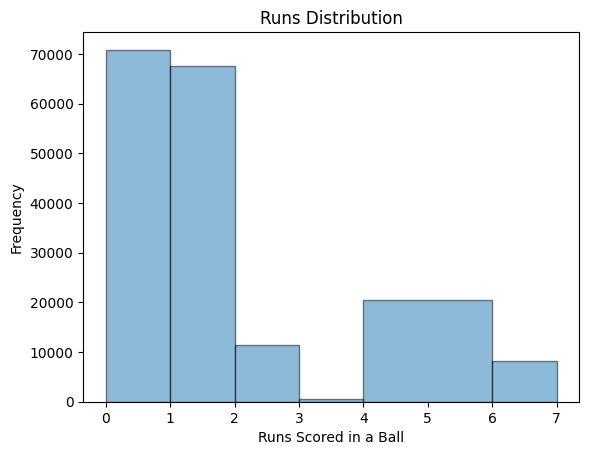

In [97]:
#histogram for batsman_runs
runs = deli['batsman_runs']
bins = [0, 1, 2, 3, 4, 6, 7]

plt.hist(runs, bins=bins, edgecolor='k', alpha=0.5)
plt.title('Runs Distribution')
plt.xlabel('Runs Scored in a Ball')
plt.ylabel('Frequency')

In [98]:
#most runs scored over wise
runs_in_over = deli.groupby("over")["total_runs"].sum().reset_index()
ff.create_table(runs_in_over, "ice")

In [99]:
px.bar(runs_in_over, x="over", y="total_runs",
       color="total_runs", color_continuous_scale="Viridis",
       text="total_runs",
       title="Compaing the Total Runs in Conceded or Scored Over Wise Till 2019")

In [100]:
#most wickets in which over
most_wickets_over = deli.groupby("over")["player_dismissed"].count().reset_index()
ff.create_table(most_wickets_over)

In [101]:
px.bar(most_wickets_over, x="over", y="player_dismissed",
       color="player_dismissed", color_continuous_scale="cividis",
       text="player_dismissed",
       title="Compaing the Total Wickets Taken Over Wise Till 2019")

In [103]:
#most runs in span of 5 overs

overs_per_span = 5

cumulative_runs_list = []

for i in range(len(runs_in_over) - overs_per_span + 1):
  current_span = runs_in_over.iloc[i:i+overs_per_span]
  current_span["cumulative_runs"] = current_span["total_runs"].cumsum()
  last_cumulative_runs = current_span["cumulative_runs"].iloc[-1]
  span_name = f"{i}_{i+overs_per_span}"
  span_df = pd.DataFrame({"span": [span_name], "cumulative_runs": [last_cumulative_runs]})
  cumulative_runs_list.append(span_df)

cumulative_runs = pd.concat(cumulative_runs_list, ignore_index=True)
ff.create_table(cumulative_runs)

In [104]:
#plot to show how runs are scored over a span of 5 overs
px.bar(cumulative_runs, x="span", y="cumulative_runs",
       color="cumulative_runs", color_continuous_scale="aggrnyl",
       text="cumulative_runs",
       title="Cumulative Runs 5-Over Span")

In [105]:
# most wickets in which 5 over span
#using overs_per_span = 5 we created above
cumulative_wickets_list = []

for i in range(len(most_wickets_over) - overs_per_span + 1):
    current_span = most_wickets_over.iloc[i:i+overs_per_span]
    current_span["cumulative_wickets"] = current_span["player_dismissed"].cumsum()
    last_cumulative_wickets = current_span["cumulative_wickets"].iloc[-1]
    span_name = f"{i}_{i+overs_per_span}"
    span_df = pd.DataFrame({"span": [span_name], "cumulative_wickets": [last_cumulative_wickets]})
    cumulative_wickets_list.append(span_df)

cumulative_wickets = pd.concat(cumulative_wickets_list, ignore_index=True).sort_values("cumulative_wickets", ascending=False)
ff.create_table(cumulative_wickets)


In [106]:
#plot to show how wickets fall over a span of 5 overs
px.bar(cumulative_wickets, x="span", y="cumulative_wickets",
       color="cumulative_wickets", color_continuous_scale="aggrnyl",
       text="cumulative_wickets",
       title="Cumulative Wickets 5-Over Spanwise")

In [107]:
#dismissal kind
dismissal = deli.groupby("dismissal_kind")["dismissal_kind"].count().reset_index(name="count").sort_values("count", ascending=False)
dismissal = dismissal.loc[dismissal["dismissal_kind"] != "No Dismissal"]
ff.create_table(dismissal, "aggrnyl")

In [108]:
px.bar(dismissal, x="dismissal_kind", y="count",
           color="dismissal_kind", color_discrete_sequence=px.colors.sequential.Inferno_r,
           text="count",
           title="Comparing the Dismissal Kind"
           ).update_traces(textposition="outside")

In [109]:
#most catches
catches = deli[deli["dismissal_kind"] == "caught"]
player_catches = catches.groupby("fielder")["fielder"].count().reset_index(name="catches").sort_values("catches", ascending=False).head(20)
ff.create_table(player_catches)

In [110]:
#win by runs
win_runs = matches[matches["win_by_runs"] > 0]
team_win_runs = win_runs[["winner", "win_by_runs"]].groupby("winner")["win_by_runs"].sum().sort_values(ascending=False).reset_index()
ff.create_table(team_win_runs)

In [111]:
px.bar(team_win_runs, x="winner", y="win_by_runs",
       color="win_by_runs", color_continuous_scale="agsunset",
       text="win_by_runs",
       title="Sum of Runs that Each Team Have Won by Throughout till 2019"
       ).update_xaxes(title_text="Team")

In [112]:
#win by wickets
win_wickets = matches[matches["win_by_wickets"] > 0]
team_win_wickets = win_wickets[["winner", "win_by_wickets"]].groupby("winner")["win_by_wickets"].sum().sort_values(ascending=False).reset_index()
ff.create_table(team_win_wickets)

In [113]:
px.bar(team_win_wickets, x="winner", y="win_by_wickets",
       color="win_by_wickets", color_continuous_scale="sunset",
       text="win_by_wickets",
       title="Sum of Wickets that Each Team Have Won by Throughout till 2019"
       ).update_xaxes(title_text="Team")

In [114]:
#player of match
potm = matches.groupby("player_of_match")["player_of_match"].count().sort_values(ascending=False).reset_index(name="count_potm").head(20)
ff.create_table(potm)

In [115]:
px.bar(potm, x="player_of_match", y="count_potm",
       color="count_potm", color_continuous_scale="sunsetdark",
       text="count_potm",
       title="Most Player of the Match Awards till 2019"
       ).update_xaxes(title_text="Team"
       ).update_traces(textposition="outside")

In [125]:
#most runs season wise
season_wise_runs = del_match.groupby(["season", "batsman"])["batsman_runs"].sum().reset_index()

def get_top_runs(df):
  return df.sort_values("batsman_runs", ascending=False).head(1)

top_runs_each_season = season_wise_runs.groupby("season").apply(get_top_runs).reset_index(drop=True)
ff.create_table(top_runs_each_season)

In [127]:
#treemap for seasonwise most runs
px.treemap(top_runs_each_season, path=["season", "batsman", "batsman_runs"],
           color="season", color_continuous_scale="sunset",
           title="Categorising Top Run Scorers for Each Season")

In [134]:
px.bar(top_runs_each_season, x="batsman", y="batsman_runs",
       color="season", color_continuous_scale="sunset",
       text=[f"season:{row['season']}<br>runs:{row['batsman_runs']}"for i, row in top_runs_each_season.iterrows()],
       title="Bar Graph to Compare the Top Run Scorers for Each Season",
       barmode="stack"
       ).update_traces(textfont=dict(size=10))

In [129]:
wicket_types = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled']
wickets_df = del_match[del_match['dismissal_kind'].isin(wicket_types)]
season_wise_wickets = wickets_df.groupby(["season", "bowler"])["dismissal_kind"].count().reset_index()

def get_top_wickets_takers(df):
    return df.sort_values("dismissal_kind", ascending=False).head(1)

top_wicket_takers_season = season_wise_wickets.groupby("season").apply(get_top_wickets_takers).reset_index(drop=True)
top_wicket_takers_season.rename(columns={"dismissal_kind":"total_wickets"}, inplace=True)
ff.create_table(top_wicket_takers_season)


In [130]:
#treemap for seasonwise most runs
px.treemap(top_wicket_takers_season, path=["season", "bowler", "total_wickets"],
           color="season", color_continuous_scale="tealrose",
           title="Categorising Top Wicket Takers for Each Season")

In [137]:
px.bar(top_wicket_takers_season, x="bowler", y="total_wickets",
       color="season", color_continuous_scale="tealrose",
       text=[f"season:{row['season']}<br>runs:{row['total_wickets']}"for i, row in top_wicket_takers_season.iterrows()],
       title="Bar Graph to Compare the Top Wicket Takers for Each Season",
       barmode="stack"
       ).update_traces(textfont=dict(size=10))

In [120]:
#partnership stats
# Calculate partnership statistics based on runs and balls faced
partnership_stats = deli.groupby(['batsman', 'non_striker']).agg({'batsman_runs': 'sum', 'ball': 'count'}).reset_index()
partnership_stats.rename(columns={'batsman_runs': 'partnership_runs', 'ball': 'balls_faced'}, inplace=True)
partnership_stats["strike_rate"] = (partnership_stats["partnership_runs"]/partnership_stats["balls_faced"])*100
partnership_stats = round(partnership_stats.sort_values("partnership_runs", ascending=False),2).head(10)
ff.create_table(partnership_stats,"ylorrd_r")

In [121]:
part_ticks = [f"{batsman} & {non_striker}" for batsman, non_striker in zip(partnership_stats["batsman"], partnership_stats["non_striker"])]
px.bar(partnership_stats, x=part_ticks, y="partnership_runs",
       color="partnership_runs", color_continuous_scale="greens",
       title="Best Partnerships Till 2019",
       text=[f"runs:{row['partnership_runs']}<br>sr:{row['strike_rate']}" for i, row in partnership_stats.iterrows()],
       ).update_traces(textfont=dict(size=10))

In [122]:
#winner for every season
last_date_of_season = matches.groupby('season')['date'].max().reset_index()
each_season_winner = pd.merge(last_date_of_season, matches, on=['season', 'date'], how='inner')[['season', 'date', 'winner']]
ff.create_table(each_season_winner, "greens_r")

# **Player Recommendations**

# **Brands Looking For Sustainable Support must Go for Virat Kohli as He is Involved In Top 3 Partnerships**

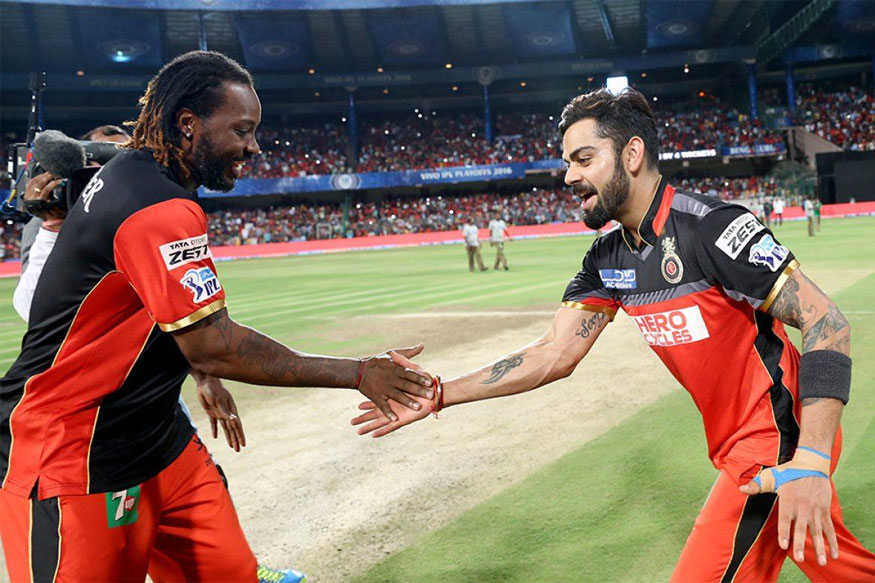

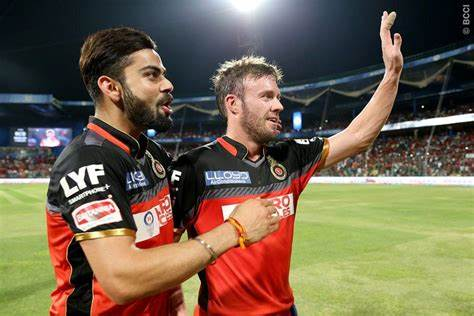

# **Brands Looking For Getting the Results, Consistency and Reliability should Opt for Mumabai Indians as they Won the IPL More than any Other Team till 2019**

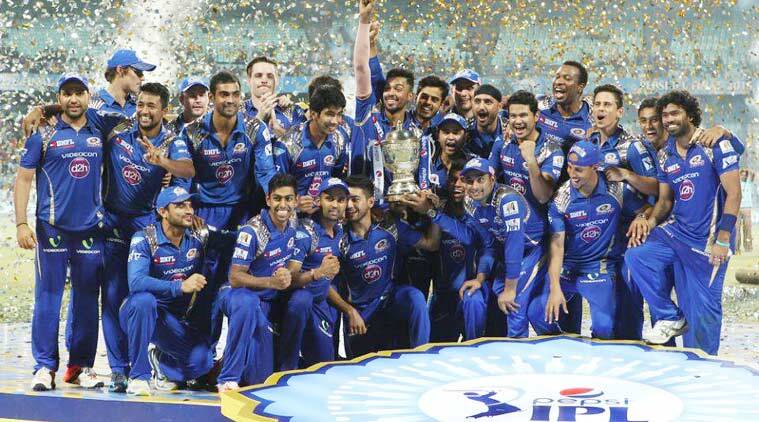

# **Brands Looking for Evergreen and Everlasting Player Should Go with MS Dhoni**

# **Brands Looking for a Leader who can Lead by Example must Go with MS Dhoni**

Please be aware that the statistics presented in the image may not align with the data we have analyzed, and they could have been updated to the most recent season date.

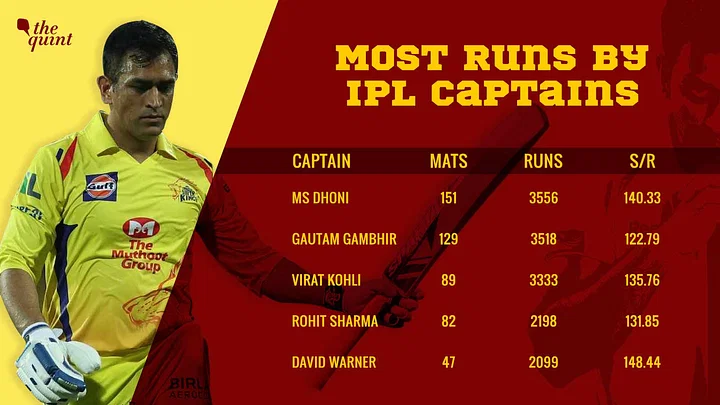